<a href="https://colab.research.google.com/github/AfonsoPaula/Data-Analysis/blob/main/notebook_pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pandas - Dataframes**

Probably the most important data structure of pandas is the **dataframe**. It's a tabular structure tightly integrated with **Series**.

In [1]:
import pandas as pd
import numpy as np

We'll keep our analysis of G7 countries and looking now at DataFrames. As said, a Dataframe looks like a lot like a table:

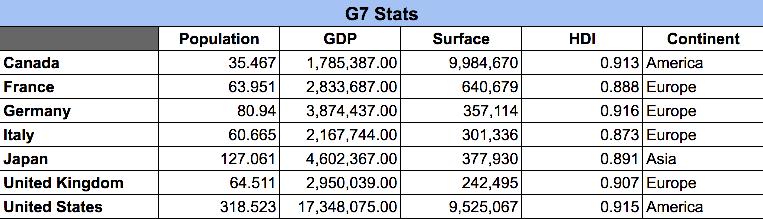

Creating **DataFrames** manually can be tedious. 99% of the time you'll be pulling the data from a Database, a csv file or the web. But still, it's possible create a DataFrame by specifying the columns and values.

In [2]:
df = pd.DataFrame({
    'Population': [35.467, 63.951, 80.94 , 60.665, 127.061, 64.511, 318.523],
    'GDP' : [
        1785387,
        2833687,
        3874437,
        2167744,
        4602367,
        2950039,
        17348075
    ],
    'Surface Area' : [
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ],
    'HDI': [
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ],
    'Continent': [
        'America',
        'Europe',
        'Europe',
        'Europe',
        'Asia',
        'Europe',
        'America'
    ]
}, columns=['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'])

In [3]:
df

,Population,GDP,Surface Area,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,80.940,3874437,357114,0.916,Europe
3,60.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


DataFrames also have indexes. As we can see in the "table" above, pandas has assigned a numeric, autoincremental index automatically to each "row" in our DataFrame. In our case, we know that each row represents a country, so we'll just reassign the index:

In [4]:
df.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]

In [5]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [6]:
df.columns

Index(['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'], dtype='object')

In [7]:
df.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Canada to United States
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    7 non-null      float64
 1   GDP           7 non-null      int64  
 2   Surface Area  7 non-null      int64  
 3   HDI           7 non-null      float64
 4   Continent     7 non-null      object 
dtypes: float64(2), int64(2), object(1)
memory usage: 336.0+ bytes


In [9]:
df.size

35

In [10]:
df.describe()

,Population,GDP,Surface Area,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


In [11]:
df.dtypes

Population      float64
GDP               int64
Surface Area      int64
HDI             float64
Continent        object
dtype: object

In [12]:
df.dtypes.value_counts()

float64    2
int64      2
object     1
dtype: int64

## **Indexing, Selection and Slicing**

Individual columns in the DataFrame can be selected with regualr indexing. Each column is represented as a **Series**:

In [13]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [14]:
df.loc['Canada'] # Select rows by Index (horizontal)

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [15]:
df.iloc[-1] # Select rows by sequential position (horizontal)

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [16]:
df['Population'] #  (vertical)

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: Population, dtype: float64

Note that the **index** of the returned Series is the same as the DatFrame. And its **name** is the name of the column.

In [17]:
df['Population'].to_frame()
#   If we want to see a more DataFrame - like format, it's possible to use the
# to_frame() method:

,Population
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


Multiple columns can also be selected simillarly to **numpy** and **Series**:

In [18]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In this case, the result is another **Dataframe**. Slicing works differently, it acts at "row level", and can be counter intuitive:

In [19]:
df[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


Row level selection works better with **loc** and **iloc** **which are recommended** over regular "direct slicing" (df[:]), **loc** selects rows matching the given index:

In [20]:
df.loc['Italy']

Population       60.665
GDP             2167744
Surface Area     301336
HDI               0.873
Continent        Europe
Name: Italy, dtype: object

In [21]:
df.loc['France':'Italy']

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe


As a second "argument", we can pass the column(s):

In [22]:
df.loc['France':'Italy', 'Population']

France     63.951
Germany    80.940
Italy      60.665
Name: Population, dtype: float64

In [23]:
df.loc['France':'Italy', ['Population', 'GDP']]

,Population,GDP
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744


**iloc** works with the (numeric) "position" of the index:

In [24]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [25]:
df.iloc[0]

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [26]:
df.iloc[-1]

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [27]:
df.iloc[[0, 1, -1]]

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
United States,318.523,17348075,9525067,0.915,America


In [28]:
df.iloc[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


In [29]:
df.iloc[1:3, 3]

France     0.888
Germany    0.916
Name: HDI, dtype: float64

In [30]:
df.iloc[1:3, [0, 3]]

,Population,HDI
France,63.951,0.888
Germany,80.940,0.916


In [31]:
df.iloc[1:3, 1:3]

,GDP,Surface Area
France,2833687,640679
Germany,3874437,357114


**Always use *loc* and *ilo*c to reduce ambiguity, specially with Dataframes with numeric indexes**

## **Condition Selection (boolean arrays)**

Work the same way as we saw for Series (notebook_pandas1):

In [32]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [33]:
df['Population'] > 70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: Population, dtype: bool

In [34]:
df.loc[df['Population'] > 70]

,Population,GDP,Surface Area,HDI,Continent
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United States,318.523,17348075,9525067,0.915,America


The boolean matching is done at index level, so we can filter by any row, as long as it contains the indexes. Columns selection still works as expected:

In [35]:
df.loc[df['Population'] > 70, 'Population']

Germany           80.940
Japan            127.061
United States    318.523
Name: Population, dtype: float64

In [36]:
df.loc[df['Population'] > 70, ['Population', 'GDP']]

,Population,GDP
Germany,80.940,3874437
Japan,127.061,4602367
United States,318.523,17348075


## **Dropping stuff**

Opposed to the concept of selection, we have "dropping". Instead of pointing out which values we would like to select, we could point which ones we would like to **drop**:

In [37]:
df.drop('Canada')

# Permanent
# df2 (or just 'df') = df.drop('Canada')

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [38]:
df.drop(['Canada', 'Japan'])

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [39]:
df.drop(columns=['Population', 'HDI'])

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [40]:
df.drop(['Italy', 'Canada'], axis=0)

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [41]:
df.drop(['Population', 'HDI'], axis=1)

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [42]:
df.drop(['Italy', 'Canada'], axis='rows')

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [43]:
df.drop(['Population', 'HDI'], axis='columns')

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


All these **drop** methods return return a new **DataFrame**.

## **Operations**

In [44]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In [45]:
df[['Population', 'GDP']] / 100

,Population,GDP
Canada,0.35467,17853.87
France,0.63951,28336.87
Germany,0.80940,38744.37
Italy,0.60665,21677.44
Japan,1.27061,46023.67
United Kingdom,0.64511,29500.39
United States,3.18523,173480.75


**Operations with Series** work at a column level, broadcasting down the rows (which can be counter intuitive).

In [46]:
crisis = pd.Series([-1_000_000, -0.3], index=['GDP', 'HDI'])
crisis

GDP   -1000000.0
HDI         -0.3
dtype: float64

In [47]:
df[['GDP', 'HDI']]

,GDP,HDI
Canada,1785387,0.913
France,2833687,0.888
Germany,3874437,0.916
Italy,2167744,0.873
Japan,4602367,0.891
United Kingdom,2950039,0.907
United States,17348075,0.915


In [48]:
df[['GDP', 'HDI']] + crisis

,GDP,HDI
Canada,785387.0,0.613
France,1833687.0,0.588
Germany,2874437.0,0.616
Italy,1167744.0,0.573
Japan,3602367.0,0.591
United Kingdom,1950039.0,0.607
United States,16348075.0,0.615


**Modifying DataFrames**

In [49]:
langs = pd.Series(
    ['French', 'German', 'Italian'],
    index=['France', 'Germany', 'Italy'],
    name = 'Language'
)

In [50]:
langs

France      French
Germany     German
Italy      Italian
Name: Language, dtype: object

In [51]:
df['Language'] = langs

In [52]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,80.940,3874437,357114,0.916,Europe,German
Italy,60.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,NaN
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN
United States,318.523,17348075,9525067,0.915,America,NaN


**Replacing values per column**

In [53]:
df['Language'] = 'English'

In [54]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
United Kingdom,64.511,2950039,242495,0.907,Europe,English
United States,318.523,17348075,9525067,0.915,America,English


**Remaining Columns**

In [55]:
df.rename(
    columns={
        'HDI' : 'Human Development Index',
        'Anual Popcorn Consumption' : 'APC'
    }, index={
        'United States' : 'USA',
        'United Kingdom' : 'UK',
        'Argentina' : 'AR'
})

,Population,GDP,Surface Area,Human Development Index,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
UK,64.511,2950039,242495,0.907,Europe,English
USA,318.523,17348075,9525067,0.915,America,English


In [56]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
United Kingdom,64.511,2950039,242495,0.907,Europe,English
United States,318.523,17348075,9525067,0.915,America,English


In [57]:
df.rename(index=str.upper)

,Population,GDP,Surface Area,HDI,Continent,Language
CANADA,35.467,1785387,9984670,0.913,America,English
FRANCE,63.951,2833687,640679,0.888,Europe,English
GERMANY,80.940,3874437,357114,0.916,Europe,English
ITALY,60.665,2167744,301336,0.873,Europe,English
JAPAN,127.061,4602367,377930,0.891,Asia,English
UNITED KINGDOM,64.511,2950039,242495,0.907,Europe,English
UNITED STATES,318.523,17348075,9525067,0.915,America,English


In [58]:
df.rename(columns=lambda x: x.lower())

,population,gdp,surface area,hdi,continent,language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
United Kingdom,64.511,2950039,242495,0.907,Europe,English
United States,318.523,17348075,9525067,0.915,America,English


All this operations are immutable.

**Dropping Columns**

In [59]:
df.drop(columns='Language', inplace=True)

In [60]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


**Adding Values**

In [61]:
df.append(pd.Series({
    'Population': 3,
    'GDP': 5
}, name='China'))

<ipython-input-61-52af9b465d5b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(pd.Series({


,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670.0,0.913,America
France,63.951,2833687,640679.0,0.888,Europe
Germany,80.940,3874437,357114.0,0.916,Europe
Italy,60.665,2167744,301336.0,0.873,Europe
Japan,127.061,4602367,377930.0,0.891,Asia
United Kingdom,64.511,2950039,242495.0,0.907,Europe
United States,318.523,17348075,9525067.0,0.915,America
China,3.000,5,NaN,NaN,NaN


In [62]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


We can directly set new index and values to the DataFrame:

In [63]:
df.loc['China'] = pd.Series({'Population': 1_400_000_000, 'Continent': 'Asia'})

In [64]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,3.546700e+01,1785387.0,9984670.0,0.913,America
France,6.395100e+01,2833687.0,640679.0,0.888,Europe
Germany,8.094000e+01,3874437.0,357114.0,0.916,Europe
Italy,6.066500e+01,2167744.0,301336.0,0.873,Europe
Japan,1.270610e+02,4602367.0,377930.0,0.891,Asia
United Kingdom,6.451100e+01,2950039.0,242495.0,0.907,Europe
United States,3.185230e+02,17348075.0,9525067.0,0.915,America
China,1.400000e+09,NaN,NaN,NaN,Asia


We can use **drop** to just remove a row by index:

In [65]:
df.drop('China', inplace=True)

In [66]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387.0,9984670.0,0.913,America
France,63.951,2833687.0,640679.0,0.888,Europe
Germany,80.940,3874437.0,357114.0,0.916,Europe
Italy,60.665,2167744.0,301336.0,0.873,Europe
Japan,127.061,4602367.0,377930.0,0.891,Asia
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe
United States,318.523,17348075.0,9525067.0,0.915,America


**More Radical Index Changes**

In [67]:
df.reset_index()

,index,Population,GDP,Surface Area,HDI,Continent
0,Canada,35.467,1785387.0,9984670.0,0.913,America
1,France,63.951,2833687.0,640679.0,0.888,Europe
2,Germany,80.940,3874437.0,357114.0,0.916,Europe
3,Italy,60.665,2167744.0,301336.0,0.873,Europe
4,Japan,127.061,4602367.0,377930.0,0.891,Asia
5,United Kingdom,64.511,2950039.0,242495.0,0.907,Europe
6,United States,318.523,17348075.0,9525067.0,0.915,America


In [68]:
df.set_index('Population')

,GDP,Surface Area,HDI,Continent
Population,,,,
35.467,1785387.0,9984670.0,0.913,America
63.951,2833687.0,640679.0,0.888,Europe
80.940,3874437.0,357114.0,0.916,Europe
60.665,2167744.0,301336.0,0.873,Europe
127.061,4602367.0,377930.0,0.891,Asia
64.511,2950039.0,242495.0,0.907,Europe
318.523,17348075.0,9525067.0,0.915,America


In [69]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387.0,9984670.0,0.913,America
France,63.951,2833687.0,640679.0,0.888,Europe
Germany,80.940,3874437.0,357114.0,0.916,Europe
Italy,60.665,2167744.0,301336.0,0.873,Europe
Japan,127.061,4602367.0,377930.0,0.891,Asia
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe
United States,318.523,17348075.0,9525067.0,0.915,America


## **Creating columns from another columns**

Altering a DataFrame often involves combining different columns into another. For example, in our Countries analysis, we could try calculate the 'GDP per capita', which is just, **GDP/Population**.

In [70]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387.0
France,63.951,2833687.0
Germany,80.940,3874437.0
Italy,60.665,2167744.0
Japan,127.061,4602367.0
United Kingdom,64.511,2950039.0
United States,318.523,17348075.0


The regular pandas way of expressing that, is just dividing each series:

In [71]:
df['GDP'] / df['Population']

Canada            50339.385908
France            44310.284437
Germany           47868.013343
Italy             35733.025633
Japan             36221.712406
United Kingdom    45729.239975
United States     54464.120330
dtype: float64

The result of that operation is just another series that it can be add to the original DataFrame:

In [72]:
df['GDP per capita'] = df['GDP'] / df['Population']

In [73]:
df

,Population,GDP,Surface Area,HDI,Continent,GDP per capita
Canada,35.467,1785387.0,9984670.0,0.913,America,50339.385908
France,63.951,2833687.0,640679.0,0.888,Europe,44310.284437
Germany,80.940,3874437.0,357114.0,0.916,Europe,47868.013343
Italy,60.665,2167744.0,301336.0,0.873,Europe,35733.025633
Japan,127.061,4602367.0,377930.0,0.891,Asia,36221.712406
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe,45729.239975
United States,318.523,17348075.0,9525067.0,0.915,America,54464.120330


### **Statistical Information**

In [74]:
df.head()

,Population,GDP,Surface Area,HDI,Continent,GDP per capita
Canada,35.467,1785387.0,9984670.0,0.913,America,50339.385908
France,63.951,2833687.0,640679.0,0.888,Europe,44310.284437
Germany,80.940,3874437.0,357114.0,0.916,Europe,47868.013343
Italy,60.665,2167744.0,301336.0,0.873,Europe,35733.025633
Japan,127.061,4602367.0,377930.0,0.891,Asia,36221.712406


In [75]:
df.describe()

,Population,GDP,Surface Area,HDI,GDP per capita
count,7.000000,7.000000e+00,7.000000e+00,7.000000,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429,44952.254576
std,97.249970,5.494020e+06,4.576187e+06,0.016592,6954.983875
min,35.467000,1.785387e+06,2.424950e+05,0.873000,35733.025633
25%,62.308000,2.500716e+06,3.292250e+05,0.889500,40265.998421
50%,64.511000,2.950039e+06,3.779300e+05,0.907000,45729.239975
75%,104.000500,4.238402e+06,5.082873e+06,0.914000,49103.699626
max,318.523000,1.734808e+07,9.984670e+06,0.916000,54464.120330


In [76]:
population = df['Population']

In [77]:
population.min(), population.max()

(35.467, 318.523)

In [78]:
population.sum()

751.118

In [79]:
population.mean()

107.30257142857144

In [80]:
population.std()

97.24996987121581

In [81]:
population.median()

64.511

In [82]:
population.describe()

count      7.000000
mean     107.302571
std       97.249970
min       35.467000
25%       62.308000
50%       64.511000
75%      104.000500
max      318.523000
Name: Population, dtype: float64

In [83]:
population.quantile(.25)

62.308

In [84]:
population.quantile([.2, .4, .6, .8, 1])

0.2     61.3222
0.4     64.1750
0.6     74.3684
0.8    117.8368
1.0    318.5230
Name: Population, dtype: float64